## Blinded cameras clustering

Here the dataset is a pandas DataFrame generated from a response.drdf file. 
The file can be found at "/storage/gpfs_data/neutrino/SAND-LAr/SAND-LAr-GRAIN-CALORIMETRY/data/cube_production/production1/cube_X0_Y0_Z-3/output/response_cut.drdf".

In [1]:
import os 
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))

df = pd.read_pickle(module_path+"\\blind_cameras_dataset\\drdf_arrays.pkl")
print(df)

      event        source                                             pixels
0      1115     CAM_NB_X0  [[1.034386, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1      1115     CAM_NB_X1  [[2.8447123, 1.9851313, 1.191889, 0.0, 1.02277...
2      1115     CAM_NB_X2  [[0.0, 0.0, 2.0428712, 1.8089218, 1.1883966, 0...
3      1115     CAM_NB_X3  [[3.2495024, 4.1333947, 3.7861702, 0.0, 0.0, 0...
4      1115     CAM_NB_X4  [[0.0, 0.0, 0.0, 1.105229, 2.885855, 0.0, 1.99...
...     ...           ...                                                ...
46963  9971  CAM_NW_X4_Y0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
46964  9971  CAM_NW_X4_Y1  [[0.0, 1.0074149, 1.0259163, 0.0, 0.0, 0.0, 0....
46965  9971  CAM_NW_X4_Y2  [[1.0870417, 0.0, 2.0022357, 0.0, 0.0, 0.0, 0....
46966  9971  CAM_NW_X4_Y3  [[1.110016, 0.0, 1.0556537, 0.0, 1.0331444, 0....
46967  9971  CAM_NW_X4_Y4  [[0.0, 0.0, 0.0, 1.04492, 0.0, 0.0, 0.0, 0.0, ...

[46968 rows x 3 columns]


Select the "pixel" column

In [2]:
dArr = df.pixels.to_numpy()
print(dArr[1].shape)
print(dArr[1])
print(dArr.shape)

(32, 32)
[[2.8447123 1.9851313 1.191889  ... 0.        0.        0.       ]
 [0.        0.        0.        ... 1.8256596 1.0067585 0.       ]
 [0.        0.        0.        ... 1.1196092 0.        0.       ]
 ...
 [0.        3.6965072 0.        ... 1.8989851 0.        1.0608884]
 [1.8520955 1.998716  0.        ... 1.1125447 0.        2.2081091]
 [2.1184785 1.9732714 0.        ... 0.        0.        1.955647 ]]
(46968,)


From the column data a numpy 2d array is created, at the same time the matrix representing each camera is flattened into a 1d array

In [4]:
import numpy as np
data = np.zeros(1024)
for i in range(dArr.shape[0]):
    #dArr[i] = dArr[i].flatten()
    data = np.column_stack((data,dArr[i].flatten()))
print(data.shape)

(1024, 46969)


Transpose the 2d array to keep different cameras in the rows, while columns represent the pixels

In [5]:
dataT = data.T
print(dataT.shape)

(46969, 1024)


Use the KMean algorithm to clusterise the datasample.
The same data are the processed to check the clusterization.

In [6]:
from sklearn.cluster import KMeans

# Declaring Model
model = KMeans(n_clusters=2)

# Fitting Model
model.fit(dataT)

# Prediction on the entire data
all_predictions = model.predict(dataT)

# Printing Predictions
print(all_predictions)

[0 0 0 ... 0 0 0]


In [10]:
print(all_predictions.shape)
print(np.count_nonzero(all_predictions == 0))
print(np.count_nonzero(all_predictions == 1))
print(np.where(all_predictions == 1))

(46969,)
46884
85
(array([  854,  1006,  1128,  1842,  5464,  5490,  7162,  7361,  8530,
        8576,  8606,  8652,  9792,  9944, 10172, 10582, 11266, 12254,
       12482, 12634, 13288, 13364, 13972, 14230, 14534, 15294, 15340,
       15341, 15720, 15750, 16556, 16967, 17194, 17696, 17878, 18157,
       19094, 19170, 19246, 19322, 19368, 19626, 20918, 22331, 22666,
       24186, 25098, 29856, 30008, 30570, 31482, 31558, 32060, 32313,
       32546, 32744, 33200, 33230, 33656, 35890, 35935, 35936, 36878,
       37258, 38140, 38474, 38520, 39006, 39051, 39052, 39128, 39614,
       39660, 39766, 40070, 41970, 42016, 42198, 42325, 43688, 43840,
       44554, 45010, 45111, 46729], dtype=int64),)


In [23]:
df.iloc[854]

event                                                  1977
source                                         CAM_NE_X2_Y3
pixels    [[1.0548458, 7.31901, 2.2687764, 3.7038498, 5....
Name: 854, dtype: object

Plot an example of camera from cluster "1". For this cluster doesn't seem to contain blinded cameras.

**Could this be due to a small number of true blinded cameras in this sample??**

In some way I should plot all the cameras of the sample to find the effective number of blinded cameras

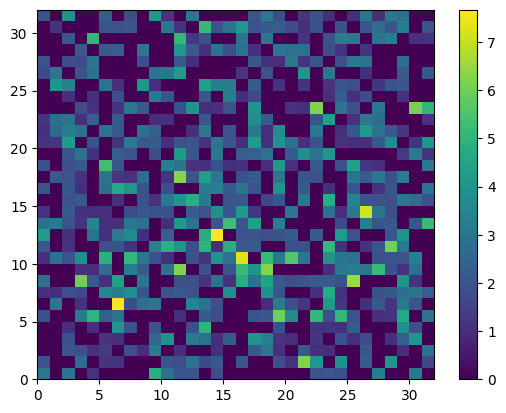

In [22]:
from matplotlib import pyplot as plt
camera = np.reshape(df.iloc[7162].pixels, (32,32))
plt.pcolormesh(camera)
plt.colorbar()